# Text Classification and Sentiment Analysis on Blog Posts

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary resources are downloaded

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Load dataset

In [4]:
df = pd.read_csv("blogs.csv")
print("Dataset shape:", df.shape)
print("Categories:\n", df['Labels'].value_counts())

Dataset shape: (2000, 2)
Categories:
 Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


# Preprocess text

In [9]:
def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['Cleaned'] = df['Data'].apply(preprocess)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Cleaned']).toarray()
y = df['Labels']

# Feature extraction

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned'])
y = df['Labels']

# Train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classification

In [14]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.84
Precision: 0.8527566520817094
Recall: 0.84
F1 Score: 0.830431692757786

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics      


# Sentiment Analysis

In [16]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)


# Sentiment distribution by category

In [17]:
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'])
print("\nSentiment Distribution by Category:\n", sentiment_dist)


Sentiment Distribution by Category:
 Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53        42
soc.religion.christian           1       61 

# Optional plot (if using Jupyter)

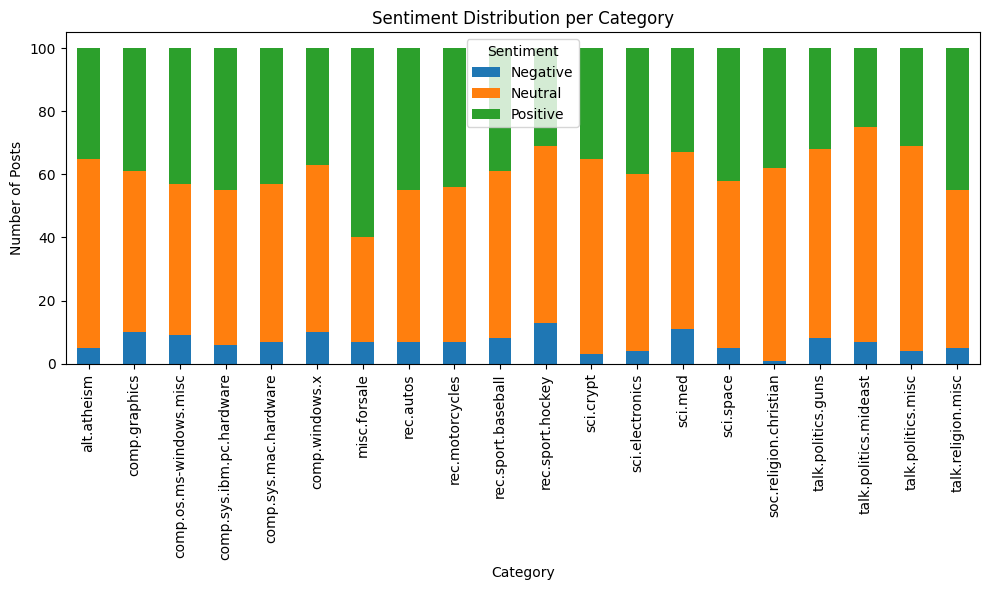

In [18]:
sentiment_dist.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution per Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()